# Bellmann Ford's Algorithm
--  short intro ----

## Fetching required modules

Before, we get started lets import code modules which would make us focus on understanding the Dijkstra's shortest path algorithm.

In [1]:
import os, sys
from os.path import dirname, join, abspath
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, abspath(join(dirname("modules"), '..')))
from modules.create_graph_from_matrix import *
from modules.visualize_graph import *

## Building example graph

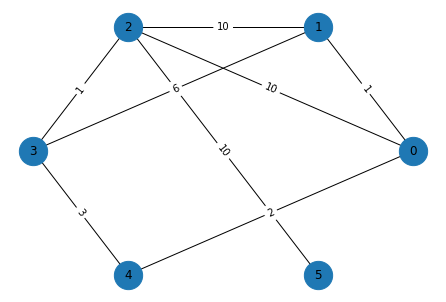

In [35]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

graphs = Graph.create_from_nodeList([a, b, c, d, e, f])


graphs.connect(a,b,1)
graphs.connect(a,c,10)
graphs.connect(a,e,2)
graphs.connect(b,c,10)
graphs.connect(b,d,6)
graphs.connect(c,d,1)
graphs.connect(c,f,10)
graphs.connect(d,e,3)

adjacentMatrix = graphs.get_adjMatrix()
visualGraph = visualizeGraph(adjacentMatrix)

## About the algorithm

### Psuedo code
<pre> <b>function</b> BellmanFord(<i>list</i> graph, <i>node</i> source)
   <i>// Step 1: initialize graph</i>
   <b>for each</b> vertex v <b>in</b> graph:
       distance[v]&nbsp;:= <b>inf</b>             // Initialize the distance to all vertices to infinity
       predecessor[v]&nbsp;:= <b>null</b>         // And having a null predecessor
   <i></i>
   distance[source]&nbsp;:= 0              // The distance from the source to itself is, of course, zero
   <i></i>
   <i>// Step 2: relax edges repeatedly</i>
   <b>for</b> i <b>from</b> 1 <b>to</b> size(vertices)-1: //just |V|-1 repetitions; i is never referenced
       <b>for each</b> edge (u, v) <b>with</b> weight w <b>in</b> edges:
           <b>if</b> distance[u] + w &lt; distance[v]:
               distance[v]&nbsp;:= distance[u] + w
               predecessor[v]&nbsp;:= u
   <i></i>
   <i>// Step 3: check for negative-weight cycles</i>
   <b>for each</b> edge (u, v) <b>with</b> weight w <b>in</b> edges:
       <b>if</b> distance[u] + w &lt; distance[v]:
           <b>error</b> "Graph contains a negative-weight cycle"
   <i></i>
   <b>return</b> distance[], predecessor[]
</pre>

## Implementing Bellmann Ford's algorithm

In [36]:
def bellmannFord(graph, sourceNode, targetNode):
    sourceNodeIndex = graph.get_nodeIndex(sourceNode)
    targetNodeIndex = graph.get_nodeIndex(targetNode)
    nodeList = graph.get_nodeList()
    
    # Make an array keeping track of distance from node to any node
    # in self.nodes. Initialize to infinity for all nodes but the 
    # starting node, keep track of "path" which relates to distance.
    # Index 0 = distance, index 1 = previous_hops
    dist = [None] * len(nodeList)
    previous = [None] * len(nodeList)
    for i in range(len(dist)):
        dist[i] = float("inf")
        previous[i] = []
        
    dist[sourceNodeIndex] = 0

    
    # Step 2: Relax all edges |V| - 1 times. A simple shortest  
    # path from src to any other vertex can have at-most |V| - 1  
    # edges 
    for i in range(len(nodeList) - 1):
        # update dist value and parent index of adjacent values of picked vertex.
        # consider those which are still in queue.
        for u, v, w in graph.get_all_edges():
            
            if dist[u]!= float("Inf") and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                
                previous[v] = list(previous[u])
                previous[v].append(u)      
                
                
    # check for negative weight cycles. If path obtained from above step (shortest distances)
    # is shorter, there's a cycle. So quit.
    for u, v, w in graph.get_all_edges():
        if dist[u] != float("Inf") and dist[u] + w < dist[v]:
            print("Negative Cycles Detected at %d" %v)
            return dist[targetNodeIndex], ["Negative Cycle Detected"]
        
    #before returning add the targetNodeIndex to visited Nodes
    previous[targetNodeIndex].append(targetNodeIndex)
    return dist[targetNodeIndex], previous[targetNodeIndex]

Total distance to sourceNode 0 from targetNode 5 is 16
Nodes part of the shortest path:  [0, 4, 3, 2, 5]


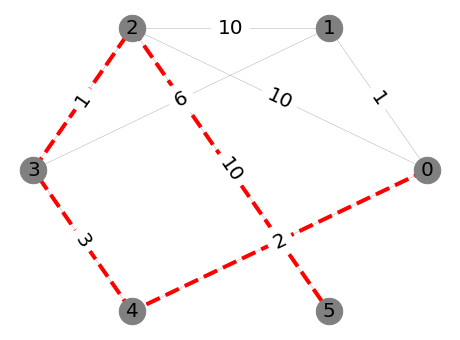

In [37]:
sourceNode = a
targetNode = f

distances, previousNodes = bellmannFord(graphs, sourceNode, targetNode)

print("Total distance to sourceNode %d from targetNode %d is %d" % (graphs.get_nodeIndex(sourceNode),  graphs.get_nodeIndex(targetNode), distances))
print("Nodes part of the shortest path: ",previousNodes)

edgelist = []
for i in range(len(previousNodes)):
            try:
                wt = graphs.getWeight(previousNodes[i],previousNodes[i+1])
                edgelist.append((previousNodes[i],previousNodes[i+1], wt))

            except IndexError:
                break

displayPath(visualGraph, edgelist)

## Detecting Negative Weights Cycles

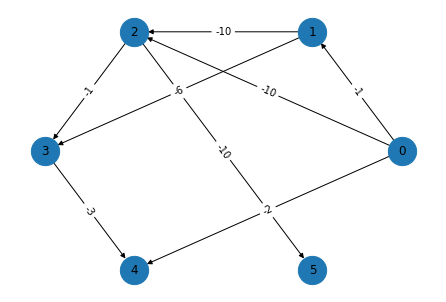

Negative Cycles Detected at 1
Total distance to sourceNode 0 from targetNode 5 is -4113
Nodes part of the shortest path:  ['Negative Cycle Detected']


In [33]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

negative_wt_graphs = Graph.create_from_nodeList([a, b, c, d, e, f], directed=True)


negative_wt_graphs.connect(a,b,-1)
negative_wt_graphs.connect(a,c,-10)
negative_wt_graphs.connect(a,e,-2)
negative_wt_graphs.connect(b,c,-10)
negative_wt_graphs.connect(b,d,-6)
negative_wt_graphs.connect(c,d,-1)
negative_wt_graphs.connect(c,f,-10)
negative_wt_graphs.connect(d,e,-3)


adjacentMatrix = negative_wt_graphs.get_adjMatrix()
visualGraph = visualizeDiGraph(adjacentMatrix)

sourceNode = a
targetNode = f

distances, previousNodes = bellmannFord(graphs, sourceNode, targetNode)

print("Total distance to sourceNode %d from targetNode %d is %d" % (graphs.get_nodeIndex(sourceNode),  graphs.get_nodeIndex(targetNode), distances))
print("Nodes part of the shortest path: ",previousNodes)

## Computing the shortest path in a graph with negative edge weights

We use the same graph but a few edges have been made negative

In [29]:
from ipynb.fs.full.CNI_1_Dijkstra_Shortest_Path import dijkstra

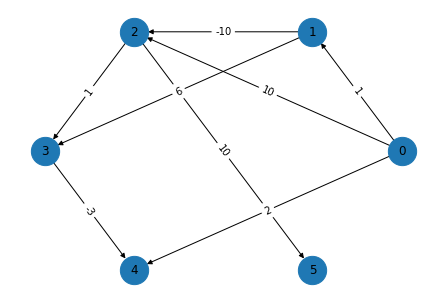

current node 0
neighbors: [1, 2, 4]
From Node 0 to Node 1 there is an edge of weight 1
Previous distance value: inf
Computed distance value: 1
Initial Distance was inf has been updated to 1 
Distance not updated, previous distance of 1 is retained
From Node 0 to Node 2 there is an edge of weight 10
Previous distance value: inf
Computed distance value: 10
Initial Distance was inf has been updated to 10 

****************************************************************************************
Total distance to sourceNode 0 from targetNode 2 is 10
Nodes part of the shortest path:  [0, 2]
10 -9


In [34]:
a = Node()
b = Node()
c = Node()
d = Node()
e = Node()
f = Node()

compare_graph = Graph.create_from_nodeList([a, b, c, d, e, f], directed=True)


compare_graph.connect(a,b,1)
compare_graph.connect(a,c,10)
compare_graph.connect(a,e,2)
compare_graph.connect(b,c,-10)
compare_graph.connect(b,d,6)
compare_graph.connect(c,d,1)
compare_graph.connect(c,f,10)
compare_graph.connect(d,e,-3)

adjacentMatrix = compare_graph.get_adjMatrix()
visualGraph = visualizeDiGraph(adjacentMatrix)

sourceNode = a
targetNode = c

distances_Dijks, previousNodes_Dijks = dijkstra(compare_graph, sourceNode, targetNode)
distances_BF, previousNodes_BF = bellmannFord(compare_graph, sourceNode, targetNode)

print(distances_Dijks, distances_BF)

## Proof of Correctness

Let G(v,E) be a weighted, directed graph where $V$ represents the set of all nodes and $E$ represents the set of all edges in the graph. $dist[u]$ represents the distance computed by the algorithm and $\delta(s,u)$ represents the actual shortest distance existing from the source node $s$ to the target node $u$.


If graph G, contains no negative weight cycles that are reachable from the source node, the Bellamm Ford Algorithm returns TRUE and $d[v] = \delta(s, v) \forall v \in V$ and the subgraph of predecessors $G_{\pi}$ is a shortest path tree rooted at $s$. If graph G contains a negative weight cycle reachable from the source node, the algorithm returns FALSE.

*To Prove:* $d[u] = \delta(s,u) \forall u \in V$ such that the graph contains no negative weight cycles.

Let us consider that node $v$ on the graph that is reachable from the source node $s$, through a path 'p' such that $p = \{v_{0}, v_{1},....., v_{k}\} \text{where v_{0} = s and v_{k} = v}$. Let path 'p' be the shortest path from the source node $s$ to node $v$ which means at most it has $|V| - 1$ edges as part of the path, thus, $k \leq |V| - 1$.

For each node v in $|V| - 1$ iterations, we perform the distance computations for the $|V| - 1$ edges as,
$$
\text{if } d[v] > d[u] + edge\_length(u,v):\\
    d[v] = d[u] + edge\_length(u,v)\\
    previous[v] = u
$$

For each iteration $i$ of the algorithm, the distance computed for a node $v_{i}$ on the path 'p', $d[v_{i}] = \delta(s, v_{i})$. The equality holds true, since we consider 'p' as the shortest path, and the distance to each edge on the path from the source node is computed in the order $(v_{0}, v_{1}), ({v_{1}, v_{2}), ......., (v_{k-1}, v_{k})$ where $v_{0} = s$, then $d[v_{k}] = \delta(s, v_{k})$. This property holds regardless for any other computation for $d[v_{k}]$ which may occur, even if they are intermixed with the distance computation of other edges in 'p'.

Thus, if a node $v \in V$ is not reachable from the source, there would exists no path from the source $s$ to node $v$ and the computed distance will be  $d[v] = \infty = \delta(s, v)$. 

Once, we establish $d[v] = \delta(s, v) \forall v in V$; we have the shortest path tree $G{\pi}$ from the source node $s$ containing all the predecessor nodes. Now, we use these claims to prove that the Bellmann Ford algorithm returns TRUE.

At the termination, we have for all (u,v) in E,
$$
d[v] = \delta(s, v)\\
    \leq d[u] + edge\_length(u,v) \\
    = d[u] + edge\_length(u,v)
$$

In none of the steps, where $d[v]$ is computed can the algorithm return FALSE. Thus, the algorithm always returns TRUE.

Now, if we consider that graph G contains negative weight cycles that is reachable from the source $s$ defined as $c = \{v_{0}, v_{1},....., v_{k}\} \text{where v_{0} = s$; then,

$$
\sum\limits_{i=1}^k edge\_length(v_{i-1}, v_{i}) <0   \text{ (Eq.1.)}
$$

Assume that the Bellmann Ford algorithm returns TRUE, for the purpose of contradiction. Then, $d[ v_{i}] \leq d[v_{i-1}] + edge\_length(v_{i-1}, v_{i})$ for $i = 1, 2, ......, k$.

Summing both sides of the above inequality for cycle $c$, we get,
$$\sum d[ v_{i}] \leq \sum d[v_{i-1}] + edge\_length(v_{i-1}, v_{i}) \\
\sum d[ v_{i}] \leq \sum d[v_{i-1}] + \sum edge\_length(v_{i-1}, v_{i})$$

In cycle $c$ since, $v_{0} = v_{k}$, each node is visited only once in each summation namely $\sum\limits_{i=1}^k d[v_{i}]$ and $\sum\limits_{i=1}^k d[v_{i-1}]$, which means 

$$\sum\limits_{i=1}^k d[v_{i}] = \sum\limits_{i=1}^k d[v_{i-1}]$$

Moreover, the Bellmann Ford algorithm finds a path 'p' from the source node $s$ to the target node $u$ on G with non-negative weight cycles only when the algorithm terminates with $d[v] < \infty$ which implies that $d[v]$ is a finite measure and that,
$$
0 \leq \sum\limits_{i=1}^k edge\_length(v_{i-1}, v_{i})  \text{ (Eq.2.)}
$$

We observe that (Eq.2.) contradicts (Eq.1.) and so, Bellmann Ford algorithm returns TRUE if and only if the graph contains a non-negative cycle that is reachable from the source node $s$.